# Comparison of wind speed at Goliat 2022
This is a comparison between the data retrieved from seklima and NORA3 at Goliat (SN76956) for year 2022

In [2]:
import netCDF4 as nc
import numpy as np

## Load in files

In [3]:
filename = "C:/Users/Ida/weather_data_2022_Goliat/NORA3_wind_50m_weather_data_GOLIAT_2022.nc"
nora_nc = nc.Dataset(filename)

filename2 = "C:/Users/Ida/weather_data_2022_Goliat/seklima_weather_data_station_GOLIAT_2022"
obs_nc = nc.Dataset(filename2)

## Convert timestamps

In [4]:
# Observations

# covert timestamps into nice readable dates
import datetime as dt
from datetime import date, timedelta

time = obs_nc.variables["time"][:]

ts = np.linspace(0,len(time)-1,len(time))

nice_time_obs = []

for i in range(0,len(ts)):
    t = dt.datetime.utcfromtimestamp(time[i]/10**9)
    nice_time_obs.append(t)
    
print(nice_time_obs[0], nice_time_obs[-1]) # check that start and end date/time is correct 
print(len(nice_time_obs))

2022-01-01 00:00:00 2022-12-31 23:40:00
26027


In [5]:
# NORA3

# covert timestamps into nice readable dates

time = nora_nc.variables["time"][:]

ts = np.linspace(0,len(time)-1,len(time))

nice_time_N = []


for i in range(0,len(ts)):
    t = dt.datetime.utcfromtimestamp(time[i])
    nice_time_N.append(t)

print(nice_time_N[0], nice_time_N[-1]) # check that start and end date/time is correct  
print(len(nice_time_N))

2022-01-01 00:00:00 2022-12-31 23:00:00
8760


## Filter whole hours from observation data

In [6]:
# Load in variables from observations
wind_speed_obs = obs_nc.variables["wind_speed"][:]

In [7]:
# NORA3 time is in whole hours, retrieve only whole hours from observationdata
# Observation data is every 20 min

# Initialize a list to store the indexes with whole hours
whole_hour_time = []
whole_hour_wind_speed = []

# Loop over each index
for i in range(len(nice_time_obs)):

    # Check if the hour is zero, indicating a whole hour
    if nice_time_obs[i].minute == 0:
        whole_hour_time.append(nice_time_obs[i])
        whole_hour_wind_speed.append(wind_speed_obs[i])
print(len(whole_hour_time))

8717


## Find missing hours

In [8]:
"""
Script to locate hours with missing data from OBSERVATION
"""

def generate_all_hours_in_year(year):
    # Create a list of all hours in the given year
    start_date = dt.datetime(year, 1, 1, 0, 0)
    end_date = dt.datetime(year + 1, 1, 1, 0, 0)
    delta = dt.timedelta(hours=1)

    current_date = start_date
    all_hours_in_year = []

    while current_date < end_date:
        all_hours_in_year.append(current_date)
        current_date += delta

    return all_hours_in_year

def find_missing_hours(dates_with_hours, all_hours_in_year):
    # Find missing hours by comparing the two lists
    missing_hours = [hour for hour in all_hours_in_year if hour not in dates_with_hours]
    return missing_hours


# Assuming you have a list of dates with hours for a given year (dates_with_hours)
year = 2022  # Change this to the desired year

# Generate all hours in the given year
all_hours_in_year = generate_all_hours_in_year(year)

# Find missing hours from "whole_hour_time"
missing_hours = find_missing_hours(whole_hour_time, all_hours_in_year)



# print amount of missing hours
print(len(missing_hours))

# Print dates with missing hours
for missing_hour in missing_hours:
       print(missing_hour)
    


43
2022-02-28 02:00:00
2022-02-28 03:00:00
2022-02-28 04:00:00
2022-02-28 05:00:00
2022-02-28 06:00:00
2022-02-28 07:00:00
2022-02-28 08:00:00
2022-04-06 21:00:00
2022-04-06 22:00:00
2022-04-06 23:00:00
2022-04-07 03:00:00
2022-04-07 04:00:00
2022-04-07 05:00:00
2022-04-07 07:00:00
2022-04-07 08:00:00
2022-12-10 09:00:00
2022-12-10 10:00:00
2022-12-10 11:00:00
2022-12-10 12:00:00
2022-12-10 13:00:00
2022-12-10 14:00:00
2022-12-10 15:00:00
2022-12-10 16:00:00
2022-12-10 17:00:00
2022-12-10 18:00:00
2022-12-10 19:00:00
2022-12-10 20:00:00
2022-12-10 21:00:00
2022-12-10 22:00:00
2022-12-10 23:00:00
2022-12-11 00:00:00
2022-12-11 01:00:00
2022-12-11 02:00:00
2022-12-11 03:00:00
2022-12-11 04:00:00
2022-12-11 05:00:00
2022-12-11 06:00:00
2022-12-11 07:00:00
2022-12-11 08:00:00
2022-12-11 09:00:00
2022-12-11 10:00:00
2022-12-11 11:00:00
2022-12-11 12:00:00


## Remove missing hours from NORA3 data

In [9]:
# Remove the hours with missing data from observation in NORA3 data as well 

wind_speed_N = obs_nc.variables["wind_speed"][:]

def remove_missing_hours_from_list(hours_list):
    # removes missing hours
    cleaned_list = [hour for hour in hours_list if hour not in missing_hours]
    return cleaned_list
    
# removes wind speeds corresponding to the missing hour
cleaned_wind_speeds = []

for date, wind_speed in zip(nice_time_N, wind_speed_N):
    if date not in missing_hours:
        cleaned_wind_speeds.append(wind_speed)
    


cleaned_time = remove_missing_hours_from_list(nice_time_N)

In [10]:
# Check lenght to be correct
print(len(cleaned_wind_speeds), len(cleaned_time))

8717 8717


## Compare wind speed

In [11]:
# Goliat at height 46m and NORA3 extracted at 50m

# Compare mean with raw data, no extrapolation 

ave_wind_OBS = sum(whole_hour_wind_speed)/len(whole_hour_wind_speed)
ave_wind_NORA = sum(cleaned_wind_speeds)/len(cleaned_wind_speeds)


print(f'Nora3: {ave_wind_NORA} m/s Obs(raw): {ave_wind_OBS} m/s')

diff = ((ave_wind_OBS-ave_wind_NORA) / ave_wind_OBS ) * 100

print(f'{diff} %')

Nora3: 8.972261099001928 m/s Obs(raw): 7.089606516003246 m/s
-26.55513502405244 %


In [12]:
# Goliat at height 46m (wind is adjusted to 10m) and NORA3 extracted at 50m

# extrapolate NORA3 data to 10m

z1 = 50 # from height (m)
z2 = 10 # to height (m)

wind_10 = []
a = 0.12


for u in cleaned_wind_speeds:
    u_2 = u*(z2/z1)**a
    wind_10.append(u_2)
    
ave_wind_10N = sum(wind_10)/len(wind_10)


print(f'Nora3(10m): {ave_wind_10N} Obs: {ave_wind_OBS}')

diff = ((ave_wind_OBS-ave_wind_10N) / ave_wind_OBS ) * 100
print(f'{diff} %')

Nora3(10m): 7.396487077812552 Obs: 7.089606516003246
-4.328597942870173 %


## Histogram

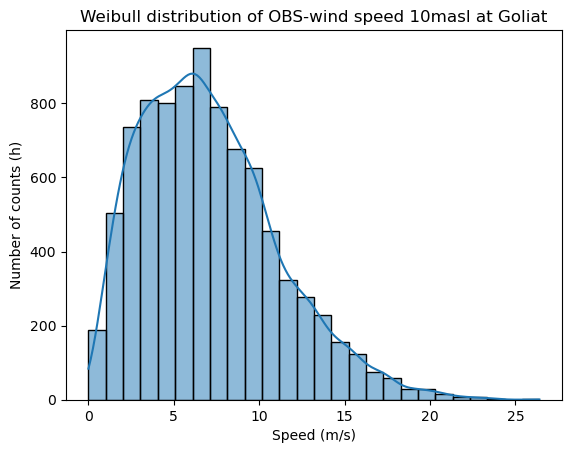

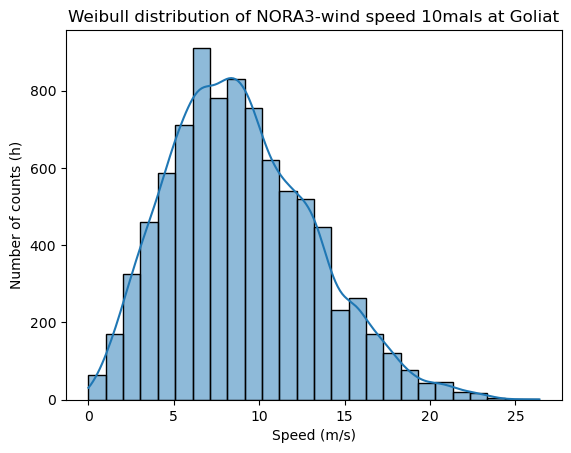

In [35]:
#install the seaborn package (if not already installed) by removing the "#" and running the code below 
#!pip3 install seaborn

import seaborn as sns
import matplotlib.pylab as plt

sns.histplot(data = obs_nc, x = whole_hour_wind_speed, kde = True, bins = 26)
plt.xlabel("Speed (m/s)")
plt.ylabel("Number of counts (h)")
plt.title("Weibull distribution of OBS-wind speed 10masl at Goliat")
plt.show()

sns.histplot(data = nora_nc, x = cleaned_wind_speeds, kde = True, bins = 26)
plt.xlabel("Speed (m/s)")
plt.ylabel("Number of counts (h)")
plt.title("Weibull distribution of NORA3-wind speed 10mals at Goliat")
plt.show()

## High and low speeds
This is used to check the amount of measurement values under a certain value for both observation and NORA3 data 

In [22]:
# check index for measurements under a certain value. 

def get_indexes_with_value(input_list, value):
    return [i for i, item in enumerate(input_list) if item < value] # Change < to > for over a certain value

# Example usage

target_value = 3  # return index if value is under target_value

result_obs = get_indexes_with_value(whole_hour_wind_speed, target_value)
result_N = get_indexes_with_value(cleaned_wind_speeds, target_value)

#print(result_obs, result_N)
print(f'Measurments under value: {target_value} m/s Obs: {len(result_obs)} NORA3: {len(result_N)}')

Measurments under value: 3 m/s Obs: 1353 NORA3: 528
